In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [2]:
active_team = pd.read_csv('active team top 100')
home_team = pd.read_csv('home team top 100')
away_team = pd.read_csv('away team top 100')
raptor_player = pd.read_csv('raptor player merge top 100')
player_team = pd.read_csv('player team merge top 100')
summary_home = pd.read_csv('home summary top 100')
summary_away = pd.read_csv('away summary top 100')
summary = pd.read_csv('summary top 100')
corr_summary = pd.read_csv('correlated summary top 100')
games_40 = pd.read_csv('40 games plus')


In [3]:
len(corr_summary) * .7, len(corr_summary) * .3

(3791.8999999999996, 1625.1)

In [4]:
len(summary) * .7, len(summary) * .3

(3791.8999999999996, 1625.1)

In [5]:
summary.columns

Index(['Unnamed: 0', 'Game ID', 'Home ID', 'Short Home', 'Home Points',
       'Difference', 'Away ID', 'Short Away', 'Away Points', 'year', 'Total',
       'home_pct', 'away_pct', 'Home Team', 'Home Player ID', 'Home Player',
       'Home Points.1', 'Home Assists', 'Home Rebounds', 'Home Minutes',
       'Home Raptor', 'Home WAR', 'Away Team', 'Away Player ID', 'Away Player',
       'Away Points.1', 'Away Assists', 'Away Rebounds', 'Away Minutes',
       'Away Raptor', 'Away WAR'],
      dtype='object')

In [6]:
corr_summary_bu = corr_summary
corr_summary = corr_summary.drop(columns = ['Home Points','Away Points'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(corr_summary.drop(columns='Difference'), 
                                                    corr_summary.Difference, test_size=0.3, 
                                                    random_state=42)

In [8]:
X_test.dtypes

Unnamed: 0         int64
year               int64
Total              int64
home_pct         float64
away_pct         float64
Home Points.1    float64
Home Assists     float64
Home Rebounds    float64
Home Minutes     float64
Home Raptor      float64
Home WAR         float64
Away Points.1    float64
Away Assists     float64
Away Rebounds    float64
Away Minutes     float64
Away Raptor      float64
Away WAR         float64
dtype: object

In [9]:
index_old = ['Unnamed: 0', 'year']
index_train = X_train[index_old]
index_test = X_test[index_old]
X_train.drop(columns=index_train, inplace=True)
X_test.drop(columns=index_test, inplace=True)

In [10]:
X_test.dtypes

Total              int64
home_pct         float64
away_pct         float64
Home Points.1    float64
Home Assists     float64
Home Rebounds    float64
Home Minutes     float64
Home Raptor      float64
Home WAR         float64
Away Points.1    float64
Away Assists     float64
Away Rebounds    float64
Away Minutes     float64
Away Raptor      float64
Away WAR         float64
dtype: object

In [101]:
feature_cols = ['Total', 'home_pct', 'away_pct', 'Home Points.1', 'Home Assists', 'Home Rebounds', 'Home Minutes',
               'Home Raptor', 'Home WAR', 'Away Points.1', 'Away Assists', 'Away Rebounds', 'Away Minutes',
               'Away Raptor', 'Away WAR']
features = X_test[feature_cols]

X = features

In [11]:
train_mean = y_train.mean()
train_mean

0.9612239514639936

In [12]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[0.96122395]])

In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([0.96122395, 0.96122395, 0.96122395, 0.96122395, 0.96122395])

In [15]:
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([0.96122395, 0.96122395, 0.96122395, 0.96122395, 0.96122395])

In [16]:
y_te_pred = train_mean * np.ones(len(y_test))
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.0005618570740244522)

In [17]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(12.222871075415602, 11.766757092524763)

In [18]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(230.80118700101954, 213.53580619481582)

In [19]:
X_train

,Total,home_pct,away_pct,Home Points.1,Home Assists,Home Rebounds,Home Minutes,Home Raptor,Home WAR,Away Points.1,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
4217,206,0.500000,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.7,3.5,2226.0,1.379565,3.857149
3816,225,0.464789,0.309859,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,5.2,1265.0,2.334951,3.104680
2899,216,0.285714,0.395349,NaN,NaN,NaN,NaN,NaN,NaN,20.1,6.5,4.4,2358.0,2.803172,5.420379
3861,203,0.471429,0.671429,NaN,NaN,NaN,NaN,NaN,NaN,8.3,2.1,3.7,1508.0,4.522579,4.948005
3459,198,0.421053,0.378378,NaN,NaN,NaN,NaN,NaN,NaN,12.9,1.6,9.9,1984.0,2.464636,4.564156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,241,0.459459,0.459459,NaN,NaN,NaN,NaN,NaN,NaN,14.3,0.9,14.2,1279.0,3.131466,3.843458
5191,227,0.679245,0.622642,NaN,NaN,NaN,NaN,NaN,NaN,4.5,1.0,1.4,1881.0,1.301735,3.277887
5226,226,0.686275,0.490196,NaN,NaN,NaN,NaN,NaN,NaN,12.4,3.7,3.9,1246.0,1.134732,2.463645
5390,230,0.800000,0.521739,NaN,NaN,NaN,NaN,NaN,NaN,24.9,4.3,6.8,2955.0,5.508413,9.158699


In [20]:
X_test

,Total,home_pct,away_pct,Home Points.1,Home Assists,Home Rebounds,Home Minutes,Home Raptor,Home WAR,Away Points.1,Away Assists,Away Rebounds,Away Minutes,Away Raptor,Away WAR
290,227,0.361111,0.444444,11.9,1.4,6.8,980.0,3.919910,3.343099,NaN,NaN,NaN,NaN,NaN,NaN
5114,213,0.666667,0.533333,NaN,NaN,NaN,NaN,NaN,NaN,12.8,5.4,2.8,2567.0,2.906803,5.357300
4897,210,0.622222,0.711111,NaN,NaN,NaN,NaN,NaN,NaN,3.7,1.0,1.7,1362.0,1.740990,3.202411
4386,237,0.521739,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,15.9,5.2,4.6,2117.0,4.696540,8.090246
1074,234,0.492537,0.313433,13.1,5.2,2.7,2211.0,1.397441,4.653322,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,230,0.454545,0.558824,NaN,NaN,NaN,NaN,NaN,NaN,21.1,4.8,4.0,2657.0,3.668179,4.390505
5015,199,0.653061,0.340426,NaN,NaN,NaN,NaN,NaN,NaN,11.9,1.4,6.8,980.0,3.919910,3.343099
2577,247,0.731343,0.656716,5.9,0.9,5.3,1243.0,3.359750,3.865372,NaN,NaN,NaN,NaN,NaN,NaN
579,198,0.421053,0.378378,11.3,3.7,3.4,1913.0,2.611151,4.416973,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
X_defaults_median = X_train.median()
X_defaults_median

Total             226.000000
home_pct            0.500000
away_pct            0.509091
Home Points.1      12.800000
Home Assists        2.900000
Home Rebounds       4.700000
Home Minutes     1898.000000
Home Raptor         2.458975
Home WAR            4.416973
Away Points.1      12.800000
Away Assists        2.900000
Away Rebounds       4.700000
Away Minutes     1908.000000
Away Raptor         2.457199
Away WAR            4.416973
dtype: float64

In [22]:
X_defaults_mean = X_train.mean()
X_defaults_mean

Total             224.972303
home_pct            0.510302
away_pct            0.513761
Home Points.1      14.498059
Home Assists        3.337951
Home Rebounds       5.546253
Home Minutes     1780.022102
Home Raptor         2.960443
Home WAR            4.728721
Away Points.1      14.344367
Away Assists        3.326482
Away Rebounds       5.555152
Away Minutes     1773.503470
Away Raptor         2.959686
Away WAR            4.711853
dtype: float64

In [23]:
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

#r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

In [24]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(12.222871075415602, 11.766757092524763)

# LINEAR REGRESSION

In [25]:
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [26]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [27]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.20612829892004514, 0.21323940366139538)

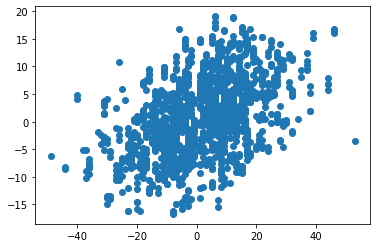

In [28]:
plt.scatter(y_test, y_te_pred)

(array([  5.,  40.,  98., 254., 365., 537., 216.,  89.,  14.,   8.]),
 array([-49. , -38.8, -28.6, -18.4,  -8.2,   2. ,  12.2,  22.4,  32.6,
         42.8,  53. ]),
 <BarContainer object of 10 artists>)

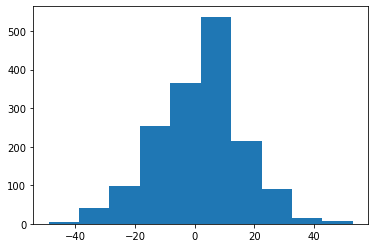

In [29]:
plt.hist(y_test)

In [30]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(10.63578754952317, 10.267773985686505)

In [31]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(183.22653093577216, 167.90721836306096)

In [42]:
print("R-squared score for training set:", r2_score(y_train, y_tr_pred))
print("R-squared score for test set:", r2_score(y_test, y_te_pred))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_tr_pred))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_te_pred))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_tr_pred))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_te_pred))

R-squared score for training set: 0.20612829892004514
R-squared score for test set: 0.21323940366139538
Mean Absolute Error for training set: 10.63578754952317
Mean Absolute Error for test set: 10.267773985686505
Mean Squared Error for training set: 183.22653093577216
Mean Squared Error for test set: 167.90721836306096


# KNN (K-Nearest Neighbors)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# Apply KNN model to training data:

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object


In [38]:
knn_2 = KNeighborsRegressor()
# Create 5 folds
#seed = 13
#kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_tr_scaled, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 15
Best p: 2
Best n_neighbors: 27


In [41]:
# Apply KNN model to training data:

knn = KNeighborsRegressor(p=2,leaf_size=15,n_neighbors=27)
knn.fit(X_tr_scaled,y_train)

# Predict using model:

y_tr_predict_knn=knn.predict(X_tr_scaled)
y_te_predict_knn=knn.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_tr_predict_knn))
print("R-squared score for test set:", r2_score(y_test, y_te_predict_knn))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_tr_predict_knn))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_te_predict_knn))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_tr_predict_knn))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_te_predict_knn))

R-squared score for training set: 0.21084645718295048
R-squared score for test set: 0.15883598502255658
Mean Absolute Error for training set: 10.669050480182108
Mean Absolute Error for test set: 10.61227278939456
Mean Squared Error for training set: 182.13757440823494
Mean Squared Error for test set: 179.51777274974398


# Epsilon-Support Vector Regression

In [44]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')
svm.fit(X_tr_scaled, y_train)

# Predict using model:

y_pred_tr_svr=svm.predict(X_tr_scaled)
y_pred_te_svr=svm.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_pred_tr_svr))
print("R-squared score for test set:", r2_score(y_test, y_pred_te_svr))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_pred_tr_svr))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_pred_te_svr))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_pred_tr_svr))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_pred_te_svr))

R-squared score for training set: 0.20499453404262125
R-squared score for test set: 0.21272577332776854
Mean Absolute Error for training set: 10.623941557915801
Mean Absolute Error for test set: 10.252053256885576
Mean Squared Error for training set: 183.48820521526164
Mean Squared Error for test set: 168.01683524141953


# Linear SVR

In [46]:
from sklearn.svm import LinearSVR

lin_svm = LinearSVR()
lin_svm.fit(X_tr_scaled, y_train)

# Predict using model:

y_pred_tr_lsvr=lin_svm.predict(X_tr_scaled)
y_pred_te_lsvr=lin_svm.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_pred_tr_lsvr))
print("R-squared score for test set:", r2_score(y_test, y_pred_te_lsvr))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_pred_tr_lsvr))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_pred_te_lsvr))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_pred_tr_lsvr))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_pred_te_lsvr))

R-squared score for training set: 0.20488668314987346
R-squared score for test set: 0.21219735989170396
Mean Absolute Error for training set: 10.623938261022577
Mean Absolute Error for test set: 10.257041827077002
Mean Squared Error for training set: 183.51309732932697
Mean Squared Error for test set: 168.1296070688448


# Random Forest (Squared-Error Criterion)

In [63]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = list(range(5,100))
min_samples_leaf = list(range(1,10))

#Convert to dictionary
hyperparameters = dict(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)

rf2= RandomForestRegressor()

#Use GridSearch
clf = GridSearchCV(rf2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_tr_scaled, y_train)

In [64]:
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])

Best n_estimators: 69
Best min_samples_leaf: 1


In [65]:
#Running with Squared Error criterion first
rf = RandomForestRegressor(bootstrap=True,n_estimators=69,criterion='squared_error',min_samples_leaf=1)
rf.fit(X_tr_scaled, y_train)

#Predict using the model:

y_pred_tr_rf = rf.predict(X_tr_scaled)
y_pred_te_rf = rf.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_pred_tr_rf))
print("R-squared score for test set:", r2_score(y_test, y_pred_te_rf))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_pred_tr_rf))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_pred_te_rf))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_pred_tr_rf))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_pred_te_rf))

R-squared score for training set: 0.9892249336533067
R-squared score for test set: 0.9018695590843715
Mean Absolute Error for training set: 0.9500227464742965
Mean Absolute Error for test set: 2.5436832629195862
Mean Squared Error for training set: 2.4868981028315718
Mean Squared Error for test set: 20.942596067422556


# Random Forest (Absolute Mean Error Criterion)

In [77]:
from sklearn.ensemble import RandomForestRegressor

#Apply RF to the training data:

#Running with Squared Error criterion first
rf2 = RandomForestRegressor(bootstrap=True,n_estimators=69,criterion='absolute_error',min_samples_leaf=1)
rf2.fit(X_tr_scaled, y_train)

#Predict using the model:

y_pred_tr_rf2 = rf2.predict(X_tr_scaled)
y_pred_te_rf2 = rf2.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_pred_tr_rf2))
print("R-squared score for test set:", r2_score(y_test, y_pred_te_rf2))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_pred_tr_rf2))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_pred_te_rf2))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_pred_tr_rf2))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_pred_te_rf2))

R-squared score for training set: 0.9854467572304215
R-squared score for test set: 0.8827706796862252
Mean Absolute Error for training set: 1.1931309470561475
Mean Absolute Error for test set: 3.0827762625452344
Mean Squared Error for training set: 3.3589057059327163
Mean Squared Error for test set: 25.018600545173697


# Gradient Boosting (Squared Error Loss)

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rate = list([0.1, 0.5, 1, 5])
n_estimators = list([25, 50, 100])
subsample = list([0.8, 1.0])
min_samples_leaf = list(range(1,5))
max_depth = list([3, 5, 7, 9])
max_leaf_nodes = list([5, 10, 25])

#Convert to dictionary
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample,
        min_samples_leaf=min_samples_leaf, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)

gb2= GradientBoostingRegressor()

#Use GridSearch
clf = GridSearchCV(gb2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_tr_scaled, y_train)

In [71]:
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best subsample:', best_model.best_estimator_.get_params()['subsample'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:', best_model.best_estimator_.get_params()['max_leaf_nodes'])

Best n_estimators: 100
Best min_samples_leaf: 4
Best learning_rate: 0.5
Best subsample: 1.0
Best max_depth: 9
Best max_leaf_nodes: 25


In [78]:
gbr1 = GradientBoostingRegressor(loss = 'squared_error', subsample=1.0, learning_rate=0.5 , n_estimators=100,
                                  random_state=5, max_depth=9, max_leaf_nodes=25, min_samples_leaf=4)
gbr1.fit(X_tr_scaled, y_train)

#Predict using the model:

y_pred_tr_gbr = gbr1.predict(X_tr_scaled)
y_pred_te_gbr = gbr1.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_pred_tr_gbr))
print("R-squared score for test set:", r2_score(y_test, y_pred_te_gbr))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_pred_tr_gbr))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_pred_te_gbr))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_pred_tr_gbr))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_pred_te_gbr))

R-squared score for training set: 0.9908745747727619
R-squared score for test set: 0.8697918401076324
Mean Absolute Error for training set: 1.0681851402806608
Mean Absolute Error for test set: 3.058250861789235
Mean Squared Error for training set: 2.1061589743356173
Mean Squared Error for test set: 27.788491235383127


# Gradient Boosting (Mean Absolute Error Loss)

In [80]:
gbr2 = GradientBoostingRegressor(loss = 'absolute_error', subsample=1.0, learning_rate=0.5 , n_estimators=100,
                                  random_state=5, max_depth=9, max_leaf_nodes=25, min_samples_leaf=4)
gbr2.fit(X_tr_scaled, y_train)

#Predict using the model:

y_pred_tr_gbr2 = gbr2.predict(X_tr_scaled)
y_pred_te_gbr2 = gbr2.predict(X_te_scaled)

print("R-squared score for training set:", r2_score(y_train, y_pred_tr_gbr2))
print("R-squared score for test set:", r2_score(y_test, y_pred_te_gbr2))
print("Mean Absolute Error for training set:", mean_absolute_error(y_train, y_pred_tr_gbr2))
print("Mean Absolute Error for test set:", mean_absolute_error(y_test, y_pred_te_gbr2))
print("Mean Squared Error for training set:", mean_squared_error(y_train, y_pred_tr_gbr2))
print("Mean Squared Error for test set:", mean_squared_error(y_test, y_pred_te_gbr2))

R-squared score for training set: 0.7304986543201969
R-squared score for test set: 0.678288705994545
Mean Absolute Error for training set: 4.004976553481593
Mean Absolute Error for test set: 4.726944275027536
Mean Squared Error for training set: 62.20123048127064
Mean Squared Error for test set: 68.6583043734295


# Comparison of the models

In [89]:
myLabels = [ 'Linear Regression','KNN','E-SVR','Linear SVR', 'Random Forest-MSE','Random Forest-MAE', 
            'Gradient Boost-MSE', 'Gradient Boost-MAE']
r2_train = [r2_score(y_train, y_tr_pred),r2_score(y_train, y_tr_predict_knn),
           r2_score(y_train, y_pred_tr_svr),r2_score(y_train, y_pred_tr_lsvr),
           r2_score(y_train, y_pred_tr_rf),r2_score(y_train, y_pred_tr_rf2),
           r2_score(y_train, y_pred_tr_gbr),r2_score(y_train, y_pred_tr_gbr2)]

r2_test = [r2_score(y_test, y_te_pred),r2_score(y_test, y_te_predict_knn),
            r2_score(y_test, y_pred_te_svr),r2_score(y_test, y_pred_te_lsvr),
            r2_score(y_test, y_pred_te_rf),r2_score(y_test, y_pred_te_rf2),
            r2_score(y_test, y_pred_te_gbr),r2_score(y_test, y_pred_te_gbr2)]

r2_tab = pd.DataFrame(list(zip(myLabels, r2_train, r2_test)),
                     columns =['Algorithm', 'R2 Train', 'R2 Test'])

print(r2_tab)

            Algorithm  R2 Train   R2 Test
0   Linear Regression  0.206128  0.213239
1                 KNN  0.210846  0.158836
2               E-SVR  0.204995  0.212726
3          Linear SVR  0.204887  0.212197
4   Random Forest-MSE  0.986088  0.876353
5   Random Forest-MAE  0.985447  0.882771
6  Gradient Boost-MSE  0.990875  0.869792
7  Gradient Boost-MAE  0.730499  0.678289


We see the Random Forest and Gradient Boost models are performing very well, some overperforming it seems in the training 
models. The Gradient Boost mean absolute error model seems to perform slightly worse due to the hyperparameters selected
were based off an MSE fit.

Random Forest Mean Absolute Error seems to have the best test results so lets go with that.

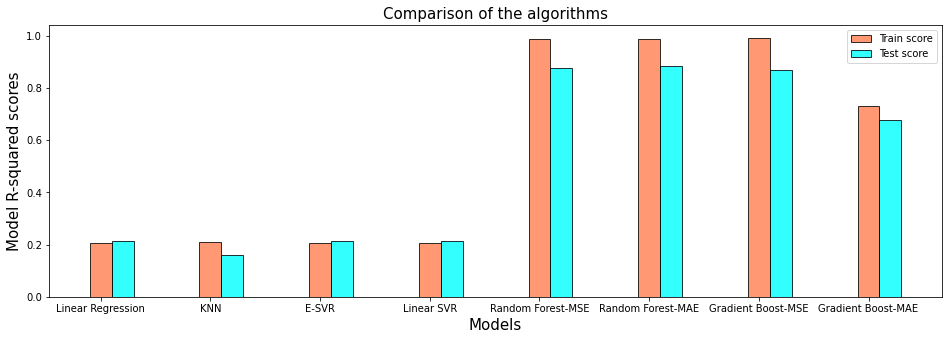

In [104]:
index=[1,2,3,4,5,6,7,8]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2]
plt.figure(figsize=(16,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model R-squared scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index,r2_train,color='coral',alpha=0.8,label='Train score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,r2_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1,2,3,4,5,6,7,8], myLabels)
plt.legend()
plt.savefig("comparison.png")
plt.show()


# Fitting with Random Forest Mean Absolute Error

         Features  Importance scores
0           Total           0.007192
1        home_pct           0.007924
2        away_pct           0.008311
3   Home Points.1           0.008580
4    Home Assists           0.008602
5   Home Rebounds           0.009702
6    Home Minutes           0.009834
7     Home Raptor           0.010947
8        Home WAR           0.011019
9   Away Points.1           0.011835
10   Away Assists           0.012546
11  Away Rebounds           0.012658
12   Away Minutes           0.230029
13    Away Raptor           0.290691
14       Away WAR           0.360128


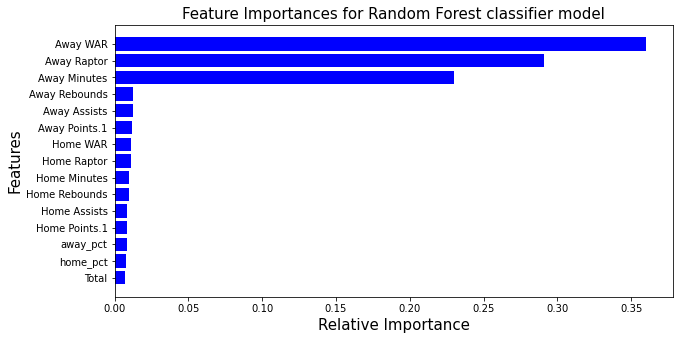

In [105]:
#Feature importances:

features = X
importances = list(rf2.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("rf_features.png")
plt.show()
#len(importances)

# Fitting with Gradient Boosting Mean Squared Error

         Features  Importance scores
0           Total           0.001550
1        home_pct           0.001561
2        away_pct           0.001695
3   Home Points.1           0.001843
4    Home Assists           0.001955
5   Home Rebounds           0.002493
6    Home Minutes           0.002538
7     Home Raptor           0.002840
8        Home WAR           0.003073
9   Away Points.1           0.003288
10   Away Assists           0.004112
11  Away Rebounds           0.004801
12   Away Minutes           0.215870
13    Away Raptor           0.345680
14       Away WAR           0.406700


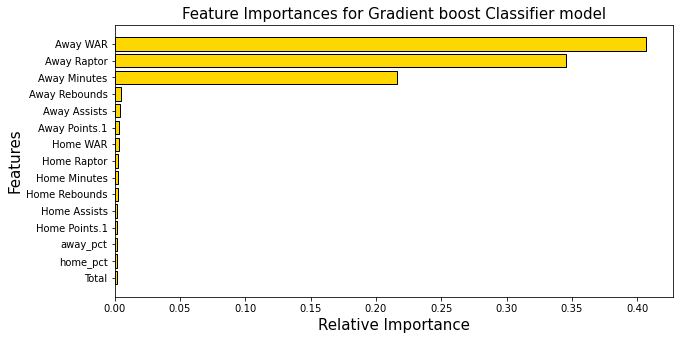

In [106]:
features = X
importances = list(gbr1.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)
plt.savefig("gb_features.png")
plt.show()
#len(importances)

I want to do further research and number tweaking. I want to have a better method to fill NaN values as my method doesn't
address that these values should be empty. And I want to clean up how I find the best hyperparameters for the models.

All that being said, it seems the Random Forest and Gradient Boosting models were by far the best as seen with the results
above. And for both, the 'Away WAR', 'Away Raptor', and 'Away Minutes' features were by far the most important.

This is currently still a Work In Progress.